In [1]:
%config IPCompleter.use_jedi=False

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [110]:
# Importando os dados e visualizando
df = pd.read_csv('../src/data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [111]:
# Descrevendo as informações dos dados
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [112]:
# verificar se há faltantes ou nulos
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [113]:
# há dois faltantes em sqft_above, sugere-se dropar
df.dropna(axis=0, inplace=True)

In [114]:
# O id pode ser um índice para a data, verificar se repete
df[['id','date']].shape

(21611, 2)

In [115]:
df[['id','date']].value_counts().shape

(21611,)

In [116]:
# como ambas têm o mesmo numero, o indice da tabela é uma combinação de id e data, pois um imóvel foi ventido mais de uma vez
# inclui id e data ao índice
df.set_index(['id','date'],inplace=True)

In [117]:
# Para agrupamento é interessante padronizar os dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [118]:
# Cria uma DataFrame já transformada, utilizando o índice original
df_aux = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

In [119]:
df_aux

,,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,date,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,-0.866671,-0.398712,-1.447519,-0.979804,-0.228329,-0.915444,-0.087177,-0.305775,-0.629163,-0.558827,-0.734681,-0.658695,-0.545013,-0.210139,1.870111,-0.352512,-0.306092,-0.943331,-0.260725
6414100192,20141209T000000,-0.005679,-0.398712,0.175564,0.533695,-0.189895,0.936439,-0.087177,-0.305775,-0.629163,-0.558827,0.460814,0.245307,-0.681199,4.746448,0.879527,1.161581,-0.746345,-0.432681,-0.187880
5631500400,20150225T000000,-0.980799,-1.473899,-1.447519,-1.426232,-0.123311,-0.915444,-0.087177,-0.305775,-0.629163,-1.409547,-1.229785,-0.658695,-1.294034,-0.210139,-0.933427,1.283545,-0.135672,1.070090,-0.172389
2487200875,20141209T000000,0.174091,0.676476,1.149414,-0.130502,-0.244022,-0.915444,-0.087177,-0.305775,2.444263,-0.558827,-0.891665,1.397909,-0.204549,-0.210139,1.085120,-0.283231,-1.271809,-0.914151,-0.284530
1954400510,20150218T000000,-0.081946,-0.398712,-0.149052,-0.435380,-0.169664,-0.915444,-0.087177,-0.305775,-0.629163,0.291892,-0.130896,-0.658695,0.544471,-0.210139,-0.073676,0.409586,1.199289,-0.272191,-0.192861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,20140521T000000,-0.490515,-0.398712,0.500181,-0.598707,-0.337427,2.788322,-0.087177,-0.305775,-0.629163,0.291892,-0.312032,-0.658695,1.293492,-0.210139,0.468342,1.004975,-0.938068,-0.666121,-0.412384
6600060120,20150223T000000,-0.381563,0.676476,0.500181,0.250595,-0.224394,0.936439,-0.087177,-0.305775,-0.629163,0.291892,0.629873,-0.658695,1.463724,-0.210139,1.272023,-0.356121,-1.051682,-0.228421,-0.203958
1523300141,20140623T000000,-0.375840,-1.473899,-1.772136,-1.154020,-0.332140,0.936439,-0.087177,-0.305775,-0.629163,-0.558827,-0.927892,-0.658695,1.293492,-0.210139,1.234642,0.247929,-0.604328,-1.410211,-0.394145


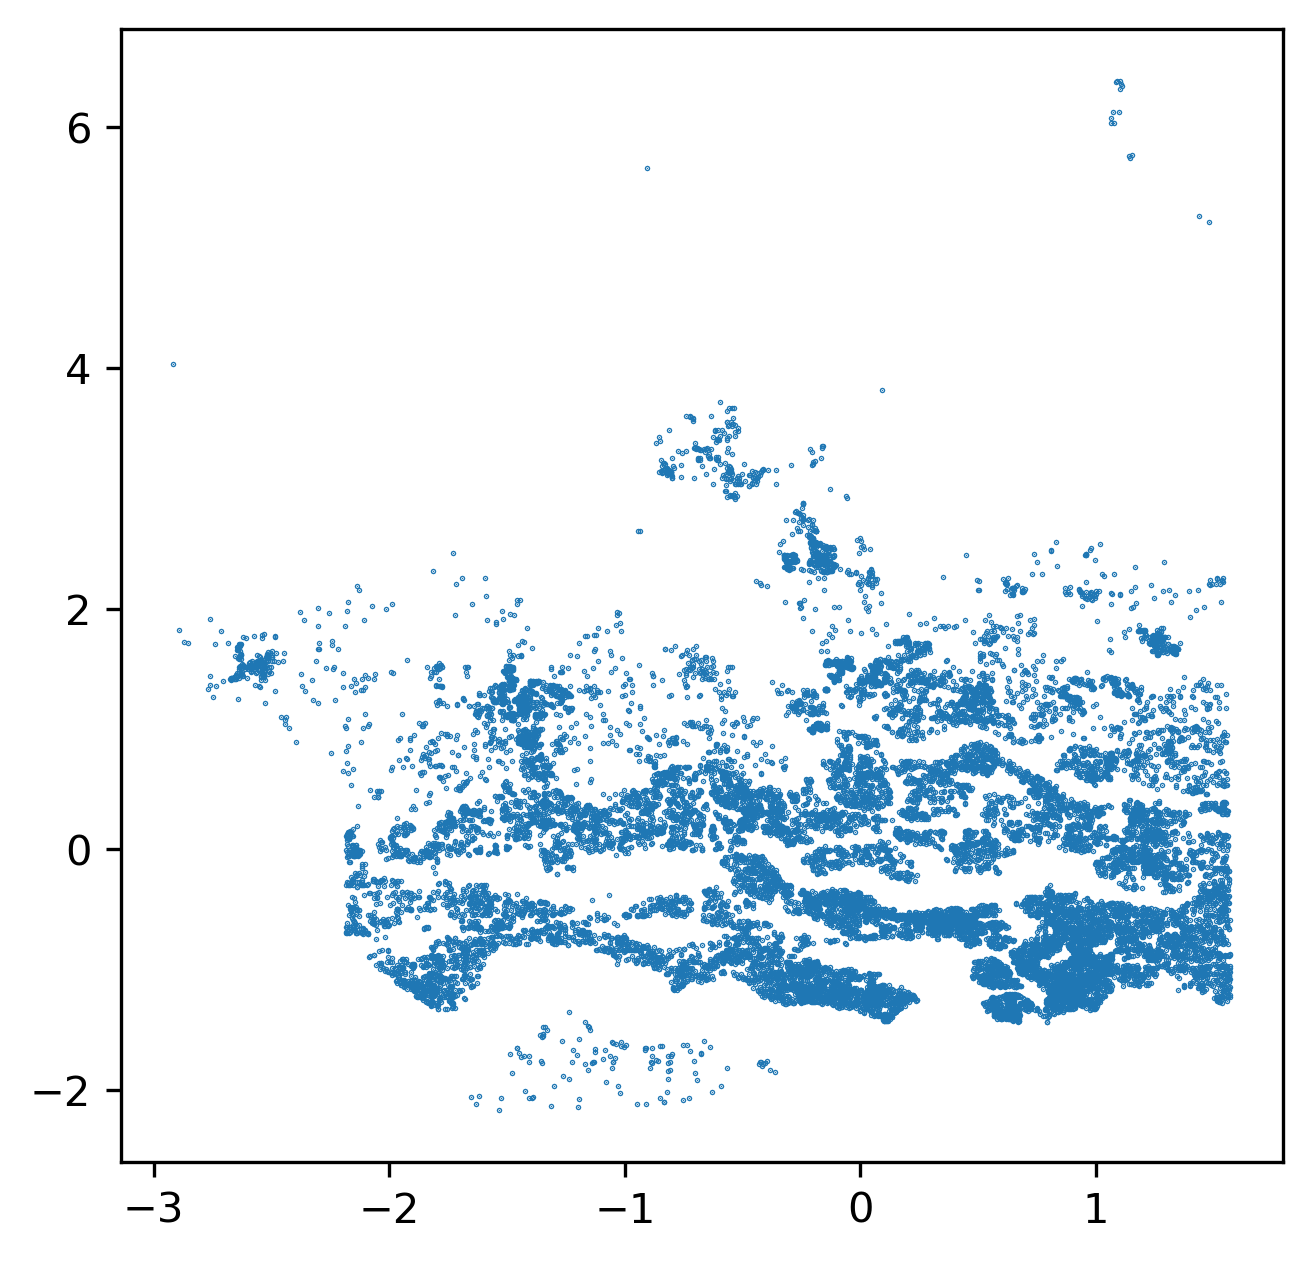

In [120]:
# Vizualização espacial dos dados
plt.figure(figsize=(5,5), dpi=300)
plt.scatter(df_aux.lat, df_aux.long, s=0.1)
plt.show()

In [121]:
# com os dados padronizados, escolher as variáveis relevantes par ao negócio
# Avaliar as casas pela valorização, excluindo informações de localiade
df_tipo = df_aux[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated','sqft_living15', 'sqft_lot15']]

In [122]:
# Utilização do modelo de Kmeans e depois Kmedoid, para encontrar o perfil das casas

In [161]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)

In [160]:
km.fit_predict(df_tipo)

array([1, 1, 1, ..., 1, 1, 1])

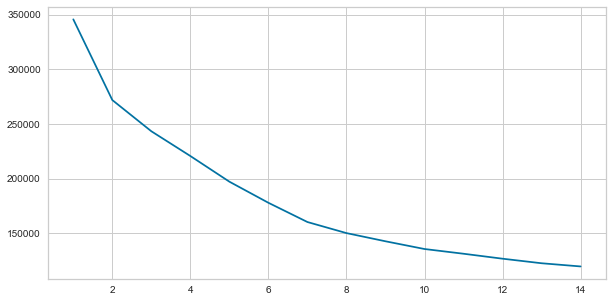

In [162]:
# Usar a métrica de Cotovelo para avaliar o numero de clusters
wws = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(df_tipo)
    wws.append(km.inertia_)
plt.figure(figsize=(10,5))
plt.plot(K,wws)
plt.show()

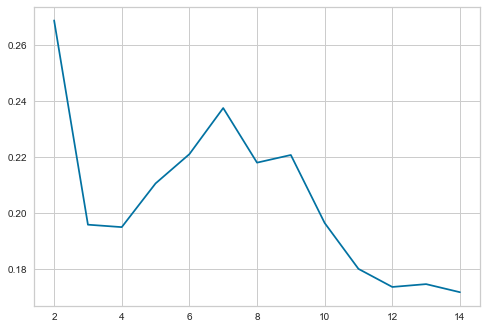

In [167]:
# O cotevelo não ficou bem definido, a métrica de silhueta pode ajudar
score = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit_predict(df_tipo)
    score.append(silhouette_score(df_tipo, km.labels_))
plt.plot(K, score)
plt.show

In [170]:
#  A flexão na silhuetta coincide com a do cotovelo, que é de 7 clusters, mesmo assim é bom consultar a área de negocios
# pegar o modelo com 7 clusters, fazer a previsão
km = KMeans(n_clusters=7)
grupo_pred = km.fit_predict(df_tipo)

In [184]:
df_grupos = df_aux.copy()

In [185]:
df_grupos["Grupos"] = grupo_pred

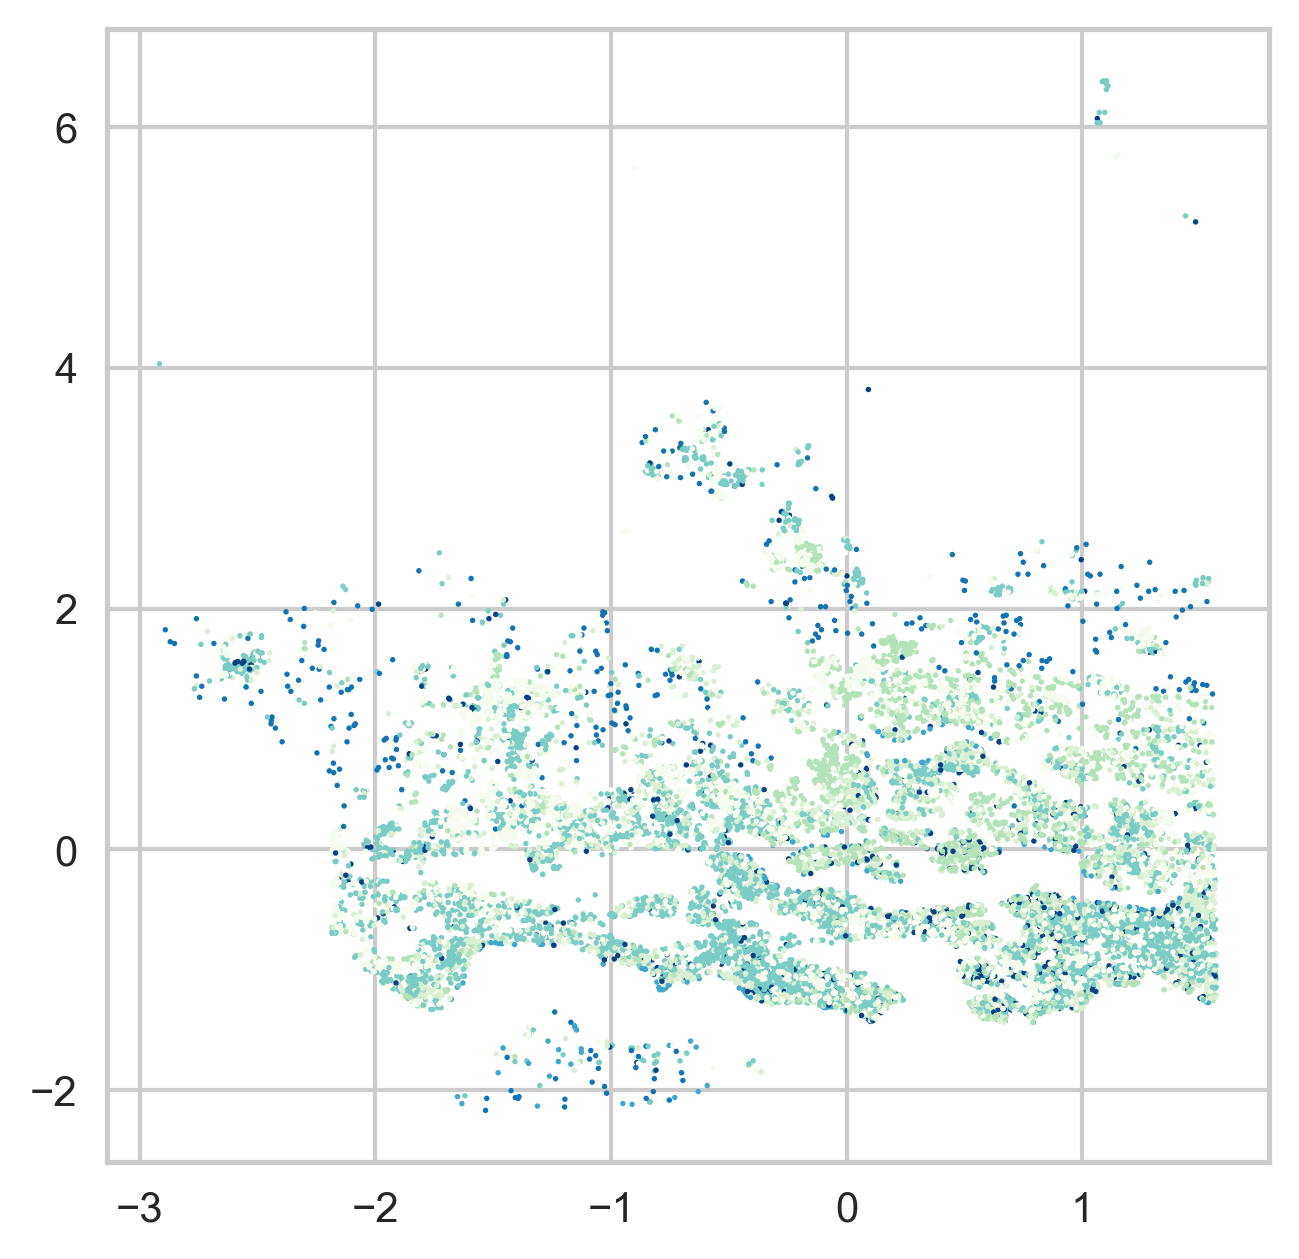

In [196]:
# Mostrar no plot por geolocalização os grupos gerados
plt.figure(figsize=(5,5), dpi=300)
plt.scatter(df_grupos.lat, df_grupos.long, s=1, c=df_grupos.Grupos, cmap='GnBu')
plt.show()

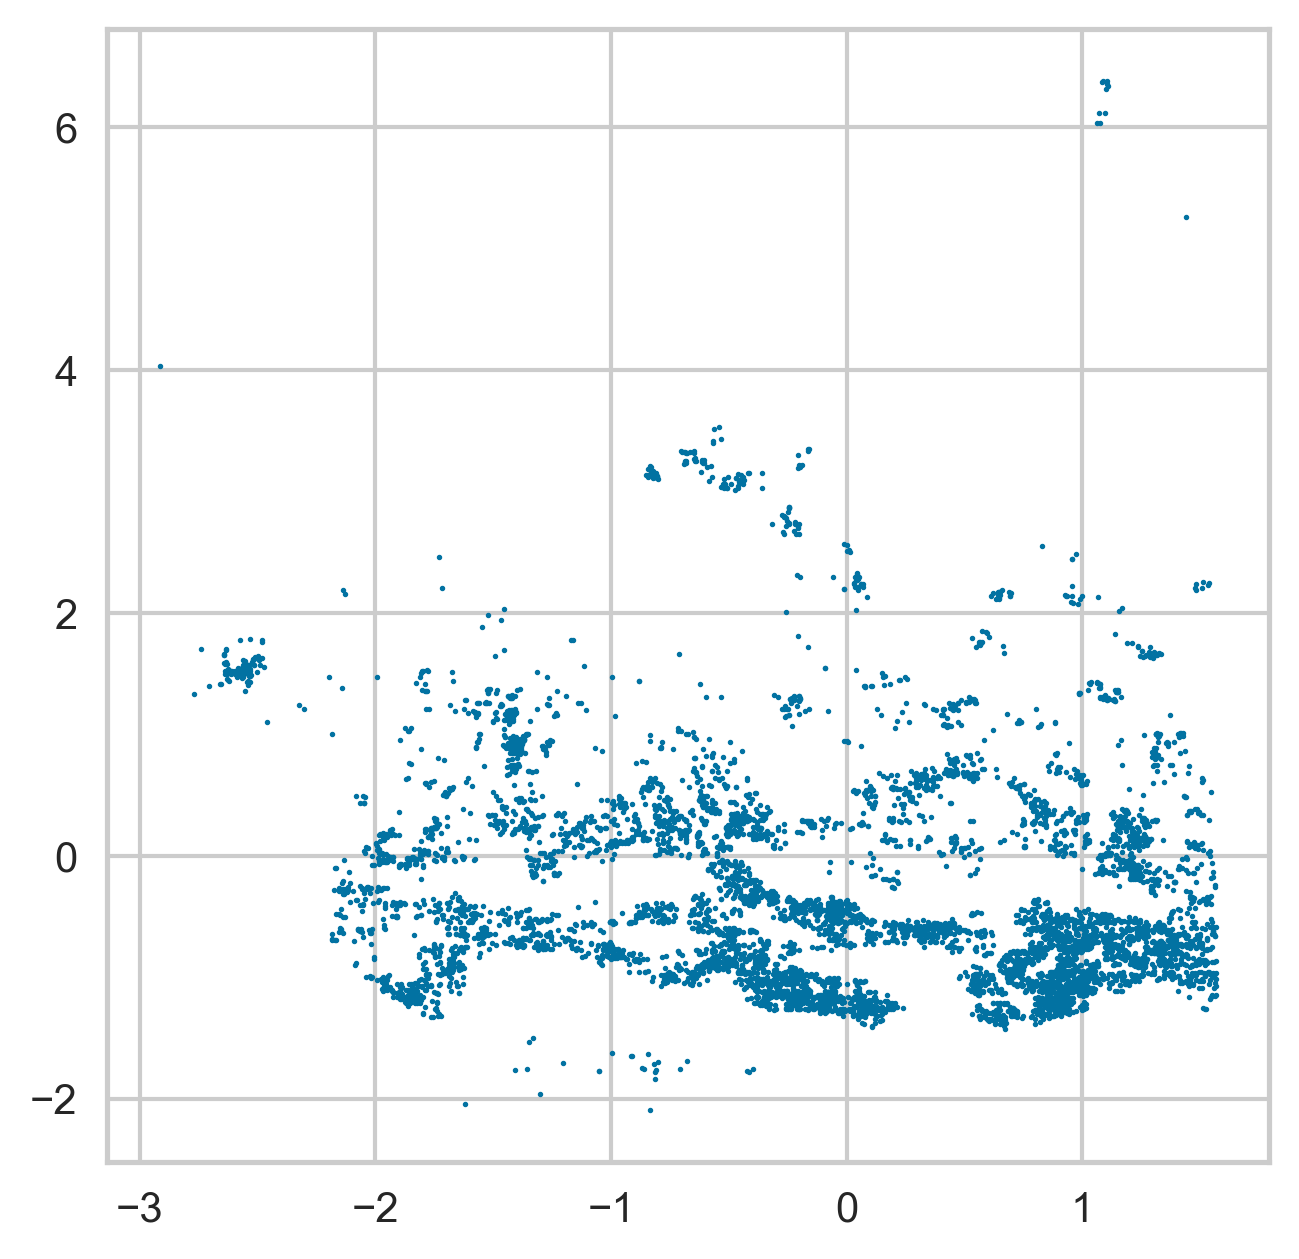

In [211]:
# Mostrar no plot por geolocalização as casas do grupo 3
plt.figure(figsize=(5,5), dpi=300)
plt.scatter(df_grupos.lat.loc[df_grupos.Grupos==3], df_grupos.long.loc[df_grupos.Grupos==3], s=1, cmap='GnBu')
plt.show()

In [197]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

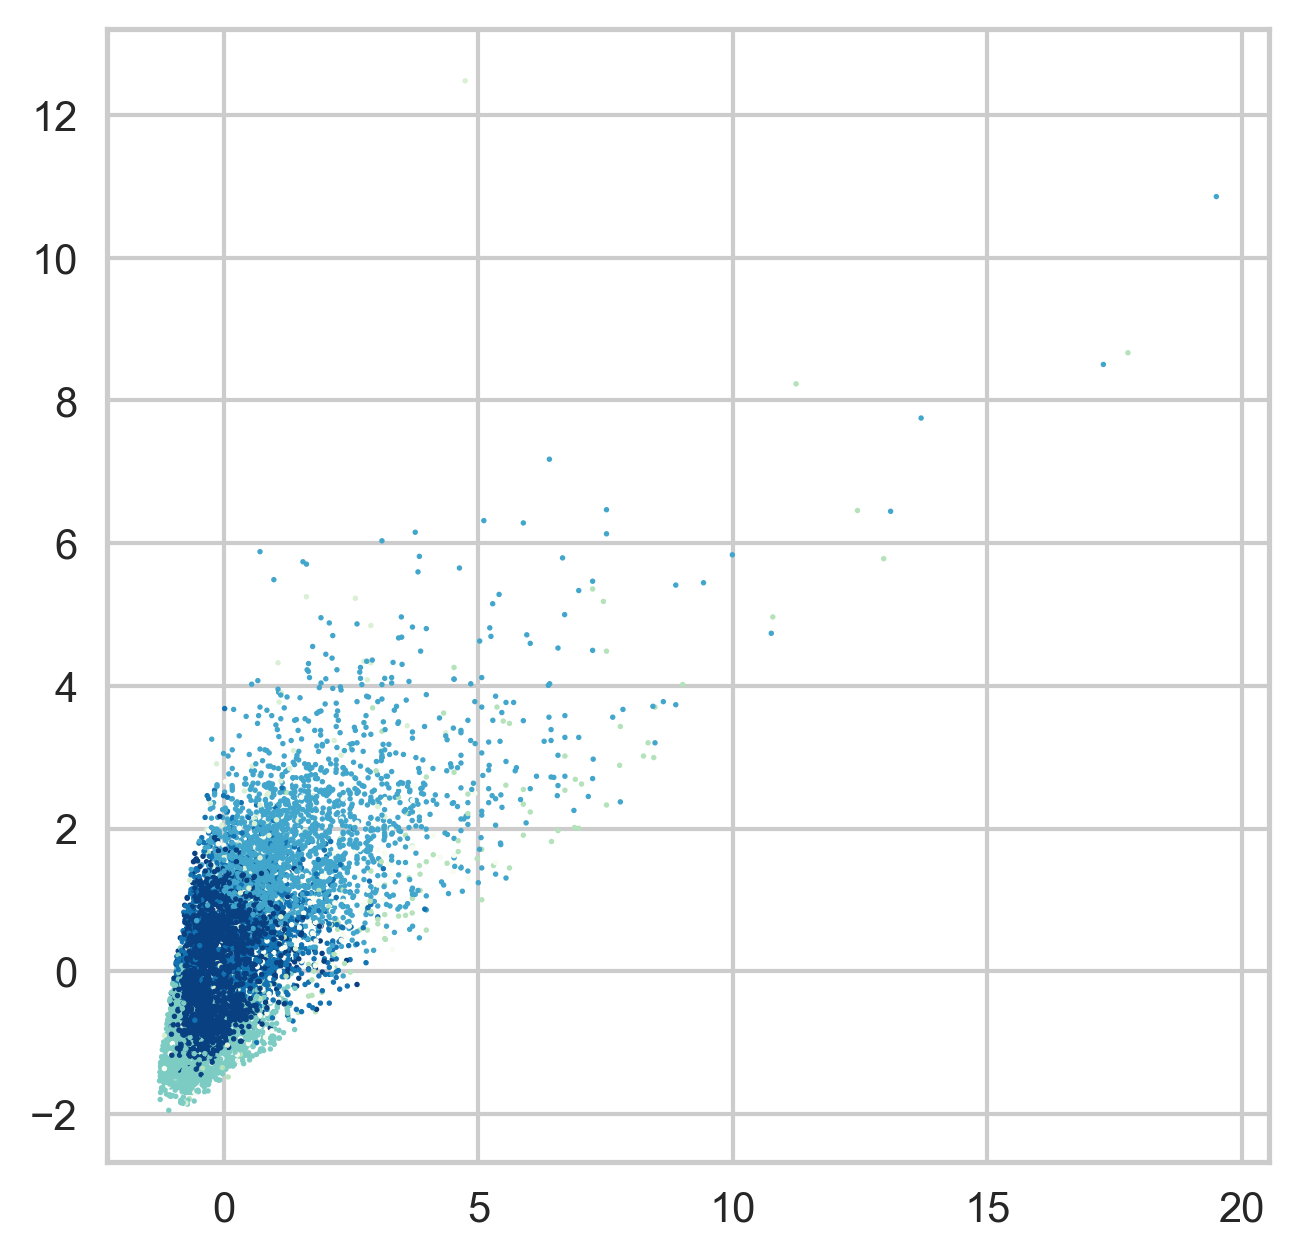

In [206]:
plt.figure(figsize=(5,5), dpi=300)
plt.scatter(df_grupos.price, df_grupos.sqft_living, s=1, c=df_grupos.Grupos, cmap='GnBu_r')
plt.show()

In [213]:
# Como o camins não especifica um ponto para o centro do cluster, a especificação do pefil de cada grupo é dificultada
# Usar KMedoids para isso
from sklearn_extra.cluster import KMedoids
km = KMedoids(n_clusters=7)

In [214]:
grupo_pred = km.fit_predict(df_tipo)

In [216]:
df_medoid = df_aux.copy()
df_medoid["Grupos"] = grupo_pred

In [219]:
df.iloc[km.medoid_indices_]

,,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,date,,,,,,,,,,,,,,,,,,,
11520640,20140801T000000,810000.0,4,2.75,3010,10450,2.0,0,0,3,9,3010.0,0,1996,0,98052,47.6979,-122.112,3010,10530
7234601541,20140728T000000,651000.0,3,3.00,2260,1834,2.0,0,0,3,8,1660.0,600,2002,0,98122,47.6111,-122.308,2260,1834
1683900040,20141215T000000,330000.0,3,2.25,1440,5150,2.0,0,0,3,7,1440.0,0,1997,0,98106,47.5456,-122.356,1530,5238
8718500555,20140915T000000,450000.0,3,1.50,1440,9711,1.0,0,0,3,7,1140.0,300,1956,0,98028,47.7394,-122.252,1590,9711
7787100390,20150420T000000,440000.0,3,2.50,2040,7605,2.0,0,0,3,8,2040.0,0,1996,0,98045,47.4876,-121.779,2150,7545
7751800115,20140826T000000,425000.0,3,1.50,1390,9680,1.0,0,0,4,7,1390.0,0,1956,0,98008,47.6340,-122.125,1460,10050
5418200340,20141013T000000,650000.0,4,2.50,2580,9450,1.0,0,0,4,8,1660.0,920,1959,0,98125,47.7030,-122.280,2060,9450


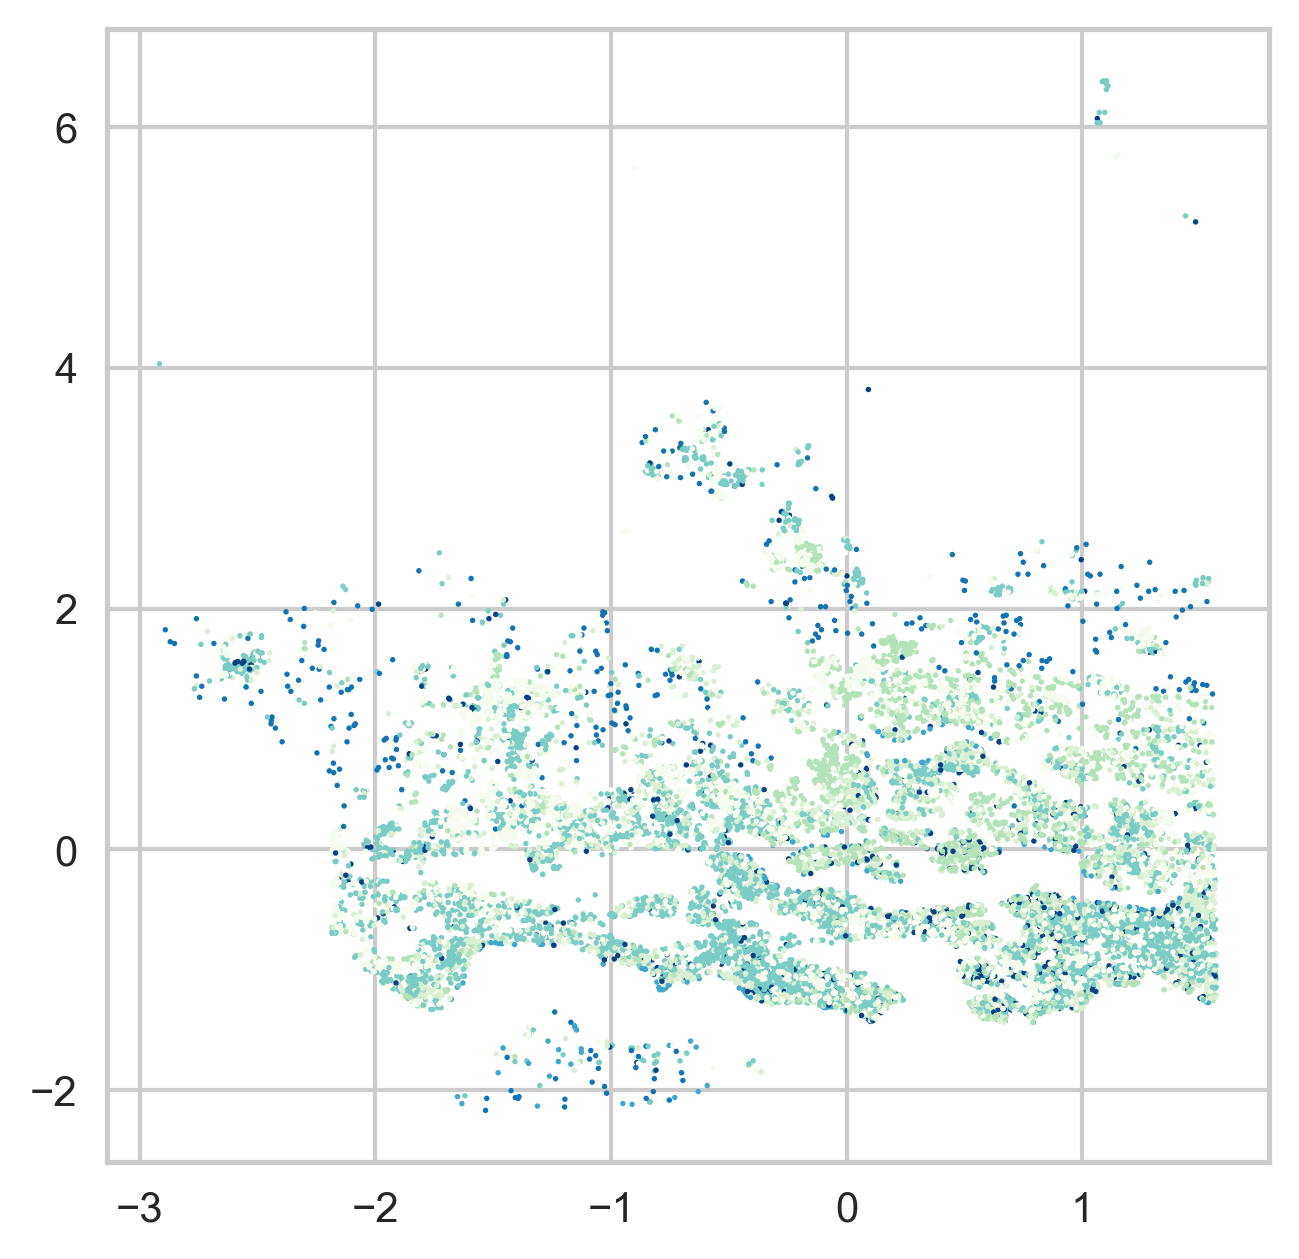

In [220]:
# Mostrar no plot por geolocalização os grupos gerados
plt.figure(figsize=(5,5), dpi=300)
plt.scatter(df_medoid.lat, df_medoid.long, s=1, c=df_grupos.Grupos, cmap='GnBu')
plt.show()